In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [87]:
data = pd.read_csv('data.csv')

In [88]:
data.shape

(6221, 75)

In [89]:
data.head()

,SEQN,Gender,Age,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,...,Dimethyldithiophosphate,Diethyldithiophosphate,Imidacloprid,Acetamiprid,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,glyphosate,UACR
0,83736,2,42,0,1,0.0,1.0,0.0,0.0,0.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,83739,1,4,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,83745,2,15,0,0,NaN,NaN,0.0,0.0,NaN,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
3,83746,2,4,0,0,NaN,NaN,NaN,NaN,NaN,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,83748,1,3,0,0,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [90]:
# imputing missing value with 0
data.fillna(0, inplace=True)

In [91]:
# SEQN is an ordinal column not relevent to analysis
data.drop(columns=['SEQN'],inplace=True)

In [92]:
# Let us replace 1 and 2 in the gender column with 0 and 1
data['Gender'].replace([1, 2], [0, 1], inplace=True)

In [93]:
health_condition = pd.get_dummies(data['Health_cond'], drop_first=True,dtype=int)
print(health_condition.head())

   1.0  2.0  3.0  4.0  5.0
0    0    0    0    1    0
1    0    0    0    0    0
2    0    0    1    0    0
3    0    0    0    0    0
4    0    0    0    0    0


In [94]:
data.drop(['Health_cond'], axis=1, inplace=True)
data = pd.concat([data, health_condition], axis =1)
data = data.rename(columns={1:'HC1', 2: 'HC2', 3: 'HC3', 4:'HC4',5:'HC5'}) # 4 binary columns enough to describe 5 categories

In [95]:
data.columns

Index(['Gender', 'Age', 'Marital_status', 'Pregnant', 'current_drinker',
       'former_drinker_x', 'current_smoker', 'former_drinker_y', 'Aspirin_use',
       'High_Blood_pressure', 'High_Cholestrol', 'Chest_pain',
       'stomach problem', 'Chest Cold', 'Pneu_flu_ear infection', 'HIV',
       'Diabetes', 'Difficulty Hearing', 'Difficulty Seeing', 'Drug Addict',
       'Hepatitis_B', 'Hepatitis_C', 'hospitalized', 'days_hospitalised',
       'Weak Kidney', 'Dialysis', 'Kidney Stone', 'Pesticide_used', 'asthma',
       'asthma_current', 'anemia', 'overweight', 'blood_transfusion',
       'arthritis', 'gout', 'congestive heart failure',
       'coronary heart disease', 'heart attack', 'stroke', 'emphysema',
       'thyroid', 'chronic bronchitis', 'current_chronic bronchitis',
       'liver problem', 'COPD', 'jaundice', 'cancer', 'kidney_cancer',
       'Farmer', 'smoked_in_pregnancy', 'Prescribed_medicine', '2,4-D',
       '3,5,6-trichloropyridinol', '4-fluoro-3-phenoxy-benzoic acid',
 

In [96]:
# checking for missing values, there are many rows with missing values
data.isna().sum()

Gender             0
Age                0
Marital_status     0
Pregnant           0
current_drinker    0
                  ..
HC1                0
HC2                0
HC3                0
HC4                0
HC5                0
Length: 78, dtype: int64

In [97]:
data.describe()

,Gender,Age,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,...,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,glyphosate,UACR,HC1,HC2,HC3,HC4,HC5
count,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,...,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000,6221.000000
mean,0.520977,44.851953,0.358142,0.001607,0.446552,0.116380,0.141456,0.226009,0.320367,0.374377,...,0.000804,0.126828,0.262819,0.582061,0.178589,0.049831,0.146922,0.297058,0.214756,0.044687
std,0.499600,26.256515,0.479493,0.040064,0.497175,0.320706,0.348520,0.418278,0.466655,0.484001,...,0.028341,0.332807,0.440201,0.493260,0.383038,0.217614,0.354056,0.456999,0.410686,0.206633
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,68.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
data.dtypes

Gender               int64
Age                  int64
Marital_status       int64
Pregnant             int64
current_drinker    float64
                    ...   
HC1                  uint8
HC2                  uint8
HC3                  uint8
HC4                  uint8
HC5                  uint8
Length: 78, dtype: object

In [99]:
data.head()

,Gender,Age,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,...,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,glyphosate,UACR,HC1,HC2,HC3,HC4,HC5
0,1,42,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,1,0
1,0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,1,15,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,0,0,0,1,0,0
3,1,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [100]:
data['UACR'].value_counts()

0    5110
1    1111
Name: UACR, dtype: int64

<Axes: >

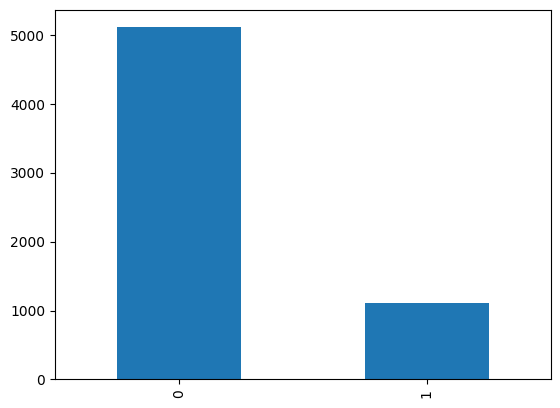

In [101]:
# It is an imbalanced dataset
data['UACR'].value_counts().plot(kind='bar')

In [102]:
# UACR is the label
y = data['UACR']

In [103]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6216    0
6217    0
6218    0
6219    0
6220    0
Name: UACR, Length: 6221, dtype: int64

In [104]:
X = data.drop(columns=['UACR'])

In [105]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X[['Age']] = std_scaler.fit_transform(X[['Age']])

In [106]:
X

,Gender,Age,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,...,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,glyphosate,HC1,HC2,HC3,HC4,HC5
0,1,-0.108628,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
1,0,-1.556004,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,1,-1.137026,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1,0,0,1,0,0
3,1,-1.556004,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,0,-1.594093,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,0,0.310350,1,0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
6217,0,0.310350,1,0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
6218,0,-1.441737,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
6219,0,-0.375250,1,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [107]:
import statsmodels.api as sm
# takes input - X(feature vector), y(target variable)
# prints significant columns with(p-value<0.05)
# outputs new dataframe with only significant features
# remove print statements when not needed
def get_p_values_significant_features(X,y):
  X = sm.add_constant(X)
  ols_model = sm.OLS(y, X).fit()

  p_features = {}
  for i in X.columns.tolist():
    p_features[f'{i}'] = ols_model.pvalues[i]

  data_pvalue= pd.DataFrame(p_features.items(), columns=['Feature_name', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)
  print('*'*50)
  print('significant features')
  print('*'*50)
  print(data_pvalue[data_pvalue['p-Value']<0.05])
  significant_features = data_pvalue[data_pvalue['p-Value']<0.05]['Feature_name'].tolist()

  return X[significant_features]

# usage of get_p_values_significant_features
X_significant = get_p_values_significant_features(X,y)
print(X_significant)

**************************************************
significant features
**************************************************
                         Feature_name       p-Value
0                            Diabetes  6.958695e-42
1                         Weak Kidney  3.112891e-35
2                        heart attack  3.395251e-22
3                        Kidney Stone  1.490515e-14
4            congestive heart failure  7.886976e-11
5                         Drug Addict  9.961026e-11
6                           emphysema  3.138472e-09
7                                 Age  4.430869e-07
8                          Chest Cold  1.855921e-06
9                            Dialysis  2.068971e-06
10                          arthritis  3.792928e-06
11                               gout  5.648975e-06
12                   former_drinker_x  9.732317e-05
13                             stroke  1.154268e-04
14                                HC2  1.269929e-04
15                         Chest_pain  1.3899

In [109]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# takes input - X(feature vector), y(target variable), no_of_features(to be selected)
# prints selected columns
# outputs new dataframe with selected features
# remove print statements when not needed
def select_k_best(X,y,no_of_features):
  k_selector = SelectKBest(mutual_info_classif, k=no_of_features)
  X_new = k_selector.fit_transform(X, y)
  chosen_indices = k_selector.get_support(indices=True)
  column_names = X.columns
  print('*'*50)
  print('selected features using mutual_info_classif')
  print('*'*50)
  selected_column_names = column_names[chosen_indices]
  print(selected_column_names)

  return X[selected_column_names]

# usage of select_k_best
X_select = select_k_best(X, y, 40)
print(X_select)

**************************************************
selected features using mutual_info_classif
**************************************************
Index(['Gender', 'Age', 'Marital_status', 'Pregnant', 'former_drinker_x',
       'former_drinker_y', 'Aspirin_use', 'High_Blood_pressure',
       'stomach problem', 'Pneu_flu_ear infection', 'HIV', 'Diabetes',
       'Difficulty Seeing', 'Hepatitis_C', 'hospitalized', 'days_hospitalised',
       'Weak Kidney', 'Pesticide_used', 'asthma', 'overweight',
       'blood_transfusion', 'congestive heart failure', 'heart attack',
       'emphysema', 'chronic bronchitis', 'COPD', 'kidney_cancer', 'Farmer',
       'smoked_in_pregnancy', 'Prescribed_medicine',
       '3,5,6-trichloropyridinol', '4-fluoro-3-phenoxy-benzoic acid',
       '3-phenoxybenzoic acid', 'Dimethylphosphate', 'Diethylthiophosphate',
       'Dimethyldithiophosphate', 'Diethyldithiophosphate', 'Clothianidin',
       'HC3', 'HC4'],
      dtype='object')
      Gender       Age  Marital

In [42]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 4.5 MB/s eta 0:00:00


In [110]:
pip install prince

import prince

# this is very similar to PCA but works for both categorical and numerical variables
# input X(feature vector), n_components(reduced no. of features)
# prints the eigen value, % variance and % cumulative variance
# output tranformed feature vector with reduced number of components
# https://pypi.org/project/prince/0.6.2/#factor-analysis-of-mixed-data-famd
# remove print statements when not needed
def famd_dim_reduction(X, n_components):
  famd = prince.FAMD(
    n_components=40,
    n_iter=5,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
  )
  famd = famd.fit(X)
  print(famd.eigenvalues_summary)
  X_famd = famd.transform(X)

  return X_famd

# usage of famd_dim_reduction
X_famd = famd_dim_reduction(X, 40)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             69.523        19.29%                     19.29%
1             22.129         6.14%                     25.42%
2             20.690         5.74%                     31.16%
3             17.278         4.79%                     35.96%
4             15.476         4.29%                     40.25%
5             14.810         4.11%                     44.36%
6             13.896         3.85%                     48.21%
7             13.367         3.71%                     51.92%
8             12.688         3.52%                     55.44%
9             12.585         3.49%                     58.93%
10            11.797         3.27%                     62.20%
11            11.436         3.17%                     65.37%
12            10.904         3.02%                     68.40%
13            10.352         2.87%                     71.27%
14      

In [151]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# recursive feature elimination
# input X(feature vector), y(target), no_of_features(reduced no. of features)
# output feature vector with reduced number of features
def dim_red_using_rfe(X, y, no_of_features):
  model = RandomForestClassifier()
  reduced_features_estimator = RFE(estimator=model, n_features_to_select=no_of_features)
  reduced_features_estimator.fit(X, y)
  reduced_col_names = reduced_features_estimator.get_feature_names_out()

  return X[reduced_col_names]

# usage of dim_red_using_rfe
X_rfe = dim_red_using_rfe(X, y, 30)

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X_significant, y, test_size=0.3, random_state=2)
X_train_select, X_test_select, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=2)
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=2)

In [121]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 30)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [122]:
# using baseline model

from sklearn import metrics

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, y_pred, average='macro'))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 SCORE OF THE MODEL: ", metrics.f1_score(y_test, y_pred, average='macro'))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

ACCURACY OF THE MODEL:  0.948580610605249
PRECISION OF THE MODEL:  0.9601082906613003
RECALL OF THE MODEL:  0.8625034339311644
F1 SCORE OF THE MODEL:  0.9020226094942383
Confusion matrix:
 [[1529    6]
 [  90  242]]


In [115]:
from sklearn.ensemble import RandomForestClassifier

clf_significant = RandomForestClassifier(n_estimators = 30)
clf_significant.fit(X_train_significant, y_train)
y_pred_significant = clf_significant.predict(X_test_significant)

In [116]:
# using significant features with p-values<0.05

from sklearn import metrics

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_significant))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, y_pred_significant, average='macro'))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred_significant, average='macro'))
print("F1 SCORE OF THE MODEL: ", metrics.f1_score(y_test, y_pred_significant, average='macro'))

ACCURACY OF THE MODEL:  0.9394750937332619
PRECISION OF THE MODEL:  0.925997180490483
RECALL OF THE MODEL:  0.8593265570425023
F1 SCORE OF THE MODEL:  0.8879561832524046


In [118]:
from sklearn.ensemble import RandomForestClassifier

clf_select = RandomForestClassifier(n_estimators = 30)
clf_select.fit(X_train_select, y_train)
y_pred_select = clf_select.predict(X_test_select)

In [119]:
# using select K features

from sklearn import metrics

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_select))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, y_pred_select, average='macro'))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred_select, average='macro'))
print("F1 SCORE OF THE MODEL: ", metrics.f1_score(y_test, y_pred_select, average='macro'))

ACCURACY OF THE MODEL:  0.9421531869309052
PRECISION OF THE MODEL:  0.9387758297560718
RECALL OF THE MODEL:  0.8574143479455281
F1 SCORE OF THE MODEL:  0.8912990037521025


In [156]:
from sklearn.ensemble import RandomForestClassifier

clf_rfe = RandomForestClassifier(n_estimators = 30)
clf_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = clf_rfe.predict(X_test_rfe)

In [157]:
# using recursive feature selection

from sklearn import metrics

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_rfe))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, y_pred_rfe, average='macro'))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred_rfe, average='macro'))
print("F1 SCORE OF THE MODEL: ", metrics.f1_score(y_test, y_pred_rfe, average='macro'))

ACCURACY OF THE MODEL:  0.9464381360471344
PRECISION OF THE MODEL:  0.9492502715704532
RECALL OF THE MODEL:  0.8635610847297988
F1 SCORE OF THE MODEL:  0.8990727886831783


In [123]:
X_train_famd = famd_dim_reduction(X_train, 40)
X_test_famd = famd_dim_reduction(X_test, 40)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             68.987        19.14%                     19.14%
1             22.149         6.14%                     25.28%
2             20.312         5.63%                     30.91%
3             17.384         4.82%                     35.74%
4             15.615         4.33%                     40.07%
5             14.719         4.08%                     44.15%
6             13.937         3.87%                     48.02%
7             13.651         3.79%                     51.80%
8             12.792         3.55%                     55.35%
9             12.373         3.43%                     58.78%
10            11.783         3.27%                     62.05%
11            11.697         3.24%                     65.30%
12            11.140         3.09%                     68.39%
13            10.314         2.86%                     71.25%
14      

In [128]:
X_train_famd.head()

component,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
3098,-2.668872,4.256097,-4.767161,5.649332,-0.490454,-1.351645,-1.489855,1.641035,0.669716,-1.382278,...,-0.991978,0.184266,-0.003038,-0.568098,1.138822,0.732127,0.691037,-0.199638,0.995139,-0.705771
6178,-1.855697,7.295255,1.013451,-9.146421,3.446336,-2.274703,-2.215893,2.586294,2.117495,0.297448,...,0.291264,2.971720,0.937891,-0.211994,-1.157631,-0.818540,0.402968,1.557886,-1.092689,1.193071
4114,-5.130079,0.629449,7.720648,0.137294,7.231920,11.502706,-11.390085,2.629728,-7.642319,3.303179,...,0.090416,0.541800,1.485288,0.440424,-1.448809,-0.645774,-0.738591,-0.167974,-0.073062,-0.084329
179,-3.717909,2.786454,-0.446371,8.087119,0.536905,-0.245495,2.132302,-0.602425,1.094003,-0.515365,...,-2.021833,-0.622439,-2.728148,-0.044944,-0.972826,0.600206,0.063798,-2.625068,2.555815,3.569015
5297,-4.265709,-5.611177,0.333428,5.748631,4.742086,0.290201,1.773595,0.843230,-2.502689,-2.683151,...,-0.378613,-0.219191,0.363192,1.141011,0.094227,0.154047,-0.610488,0.234123,0.474582,0.534900


In [134]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_famd, y_train)
y_pred_famd = clf.predict(X_test_famd)

In [135]:
# using famd dimensionality reduction

from sklearn import metrics

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_famd))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, y_pred_famd, average='macro'))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred_famd, average='macro'))
print("F1 SCORE OF THE MODEL: ", metrics.f1_score(y_test, y_pred_famd, average='macro'))

ACCURACY OF THE MODEL:  0.8173540439207284
PRECISION OF THE MODEL:  0.4562842868338558
RECALL OF THE MODEL:  0.49824869510615755
F1 SCORE OF THE MODEL:  0.4526352985479485
